# Simulaciones Laboratorio Sistema 4F y Filtrado Espacial

In [1]:
# Importamos todos los modulos necesarios
import numpy as np
import numpy.fft as ft
import scipy as sp
import matplotlib.pyplot as plt
import scienceplots
from IPython.display import HTML
from matplotlib.animation import PillowWriter
from scipy.fft import fft2, ifft2, fftfreq, fftshift
from scipy.ndimage import gaussian_filter, rotate
import matplotlib.animation as anim
import PIL
import cv2
from PIL import ImageFilter
import pint 

In [2]:
plt.style.use(['science', 'notebook'])
u = pint.UnitRegistry()

In [3]:
# Utility functions to process the image 

# Applies fft to ndimage and shifts it to adjust it
def plot2d_ft(signal, plot=False):
    ft = fftshift(fft2(signal))
    if plot:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow(np.log10((np.abs(ft))), cmap='gray')
    return ft

# Reads image file and converts it to gray scale to manage a  ndimage format
def img_2_gray(img_path, plot = False):
    img = PIL.Image.open(img_path)
    img = img.convert("L")
    if plot:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow(np.abs(img), cmap='gray')

    return np.squeeze(np.asarray(img))

# Reads image file, converts it to grayscale and resizes it to be a square  ndimage
def img_2_gray_512(img_path, plot = False):
    img = PIL.Image.open(img_path)
    img = img.convert("L")
    img = img.resize((512,512))
    if plot:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow(img, cmap='gray')

    return np.squeeze(np.asarray(img))

# Computes ift to ndimage
def plot2d_ift(signal, plot=False):
    ft = (ifft2(signal))
    if plot:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow((np.abs(ft)), cmap='gray')
    return ft

# Applies gaussean filter to ndimage
def gauss_filter(img, alpha, plot=False):
    gauss_img = gaussian_filter(img, alpha)

    if plot:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow((np.abs(gauss_img)), cmap='gray')

    return gauss_img

# Applies gaussean noise to ndimage
def gauss_noise(img, mean, sigma, plot=True):
    gaussian = np.random.normal(mean, sigma, (img.shape[0],img.shape[1])) 
    noise_img = img + gaussian

    if plot:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow((np.abs(noise_img)), cmap='gray')

    return noise_img

# Sharpens image after it's been affected by a gaussean filter of low_pass filter
def sharpen(img, alpha=30, plot=False):
    filter_blurred_f = gaussian_filter(img, 1)
    sharpened = img + alpha * (img - filter_blurred_f)

    if plot:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow((np.abs(sharpened)), cmap='gray')
        
    return sharpened

In [4]:
# We create some masks to craft spacial filters
# All lenghts must be in pixels percent and depends on size of ndimage 

# Adds circular pinhole mask to inpud ndimage 
def circular_mask(image, radius, plot=False):
    # We generate the grid for the circle function
    size_w = image.shape[1]
    size_h = image.shape[0]
    radius = (size_w * radius)/2
    x = np.arange(0, size_w)
    y = np.arange(0, size_h)
    X, Y = np.meshgrid(x, y)
    center_x = size_w // 2
    center_y = size_h // 2
    dist = np.sqrt((X-center_x)**2 + (Y-center_y)**2)
    circle = (dist <= radius).astype(int)

    if plot == True:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow(np.log1p(np.abs(image * circle)), cmap='gray')
        
    return image * circle

# Adds circular obstacle mask to input ndimage 
def obstacle_mask(image, radius, plot=False):
    size_w = image.shape[1]
    size_h = image.shape[0]
    radius = (size_w * radius)/2
    x = np.arange(0, size_w)
    y = np.arange(0, size_h)
    X, Y = np.meshgrid(x, y)
    center_x = size_w // 2
    center_y = size_h // 2
    dist = np.sqrt((X-center_x)**2 + (Y-center_y)**2)
    circle = 1 - (dist <= radius).astype(int)

    if plot == True:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow(np.log1p(np.abs(image * circle)), cmap='gray')
        
    return image * circle
    
# Adds band pass obstacle mask to input ndimage 
def iband_pass(image, inner, outer, plot=False):
   # We generate the grid for the circle function
    size_w = image.shape[1]
    size_h = image.shape[0] 
    inner = (size_w * inner)/2
    outer = (size_h * outer)/2
    x = np.arange(0, size_w)
    y = np.arange(0, size_h)
    X, Y = np.meshgrid(x, y)
    center_x = size_w // 2
    center_y = size_h // 2
    dist = np.sqrt((X-center_x)**2 + (Y-center_y)**2)
    filter = 1 - np.logical_and((dist >= inner) , (dist <= outer))
    

    if plot == True:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow(np.log1p(np.abs(image * filter)), cmap='gray')
        
    return image * filter

# Adds band pass obstacle mask to input ndimage 
def band_pass(image, inner, outer, plot=False):
   # We generate the grid for the circle function
    size_w = image.shape[1]
    size_h = image.shape[0] 
    inner = (size_w * inner)/2
    outer = (size_h * outer)/2
    x = np.arange(0, size_w)
    y = np.arange(0, size_h)
    X, Y = np.meshgrid(x, y)
    center_x = size_w // 2
    center_y = size_h // 2
    dist = np.sqrt((X-center_x)**2 + (Y-center_y)**2)
    filter = np.logical_and((dist >= inner) , (dist <= outer))
    

    if plot == True:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow(np.log1p(np.abs(image * filter)), cmap='gray')
        
    return image * filter

# Adds slit hole mask to input ndimage 
def slit_mask(image, width, height, angle=0 , plot=False):
    size_w = image.shape[1]
    size_h = image.shape[0]
    w = (width * size_w)
    h = (height * size_h)
    x = np.arange(-size_w/2, size_w/2)
    y = np.arange(-size_h/2, size_h/2)
    X, Y = np.meshgrid(x, y)
    slit = ((np.abs(X) < w/2) * (np.abs(Y) < h/2 )).astype(float)

    if angle != 0:
        slit = rotate(slit, angle, reshape=False)

    if plot == True:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow(np.log1p(np.abs(image * slit)), cmap='gray')
        
    return image * slit

def rectangle_mask(image, x, y, w, h, plot=False):

    canvas = np.zeros_like(image)
    # Ensure the square fits within the canvas boundaries
    if x + w > image.shape[1] or y + h > image.shape[0]:
        raise ValueError("Square exceeds canvas boundaries")

    # Draw the square by setting values to 1
    canvas[y:y+h, x:x+w] = 1

    if plot == True:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow(np.abs(np.array(canvas) * image), cmap='gray')

    return np.array(canvas) * image

# Adds slit obstacle mask to input ndimage 
def slit_obs_mask(image, width, height, angle=0, plot=False):
    size_w = image.shape[1]
    size_h = image.shape[0]
    w = (width * size_w)
    h = (height * size_h)
    x = np.arange(-size_w/2, size_w/2)
    y = np.arange(-size_h/2, size_h/2)
    X, Y = np.meshgrid(x, y)
    slit = 1 - ((np.abs(X) < w/2) * (np.abs(Y) < h/2 )).astype(float)

    if plot == True:
        plt.figure(num=None, figsize=(8, 6), dpi=80)
        plt.imshow(np.log1p(np.abs(image * slit)), cmap='gray')
        
    return image * slit

In [5]:
# It's recommended to use pint with this function to get the units right

# We write functions to convert from pixel size to percent image
def m_to_pc(image, pix_size, dist):
    size_w = image.shape[1]
    size_h = image.shape[0]

    area = 4 * np.pi * (dist**2)
    real_size = (pix_size**2) * (size_w * size_h)

    return area/real_size

def lh_to_pc(image, pix_size, l, h):
    size_w = image.shape[1]
    size_h = image.shape[0]
    real_size_w = (pix_size) * (size_w)
    real_size_h = (pix_size) * (size_h)

    return l/real_size_w, h/real_size_h

def mse(im1, im2):
    return ((im1 - im2) ** 2).mean(axis=None)


factor = 4 # Camera aceptance parameter


## Parte 1: Operaciones de Filtrado Espacial

### Filtros Paso Bajo

Realizamos las operaciones de procesamiento a partir de la siguiente imagen del emperador Maxiemiliano.

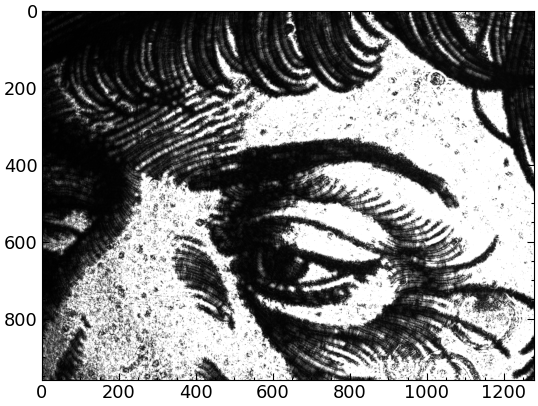

In [6]:
maxim = img_2_gray('Imagenes/maxim2_exp-12.bmp', plot=True)

Se debe tener en cuenta que el tamaño de pixel de la cámara es de $3.75\mu m$ X $3.75\mu m$, deacuerdo a esto el tamaño de la real de la imagen es de:


In [7]:
maxim.shape

(960, 1280)

In [8]:
display((np.array([maxim.shape[0], maxim.shape[1]]) * 3.75 * u.micrometer).to('mm'))

array([3.6, 4.8]) <Unit('millimeter')>

Ahora cargamos las imagenes obtenidas en el laboratorio y las comparamos con los datos obtenidos en la simulación.

In [9]:
maxim_1mm = img_2_gray('Imagenes/maxim2_baja(1mm).bmp', plot=False)
maxim_05mm = img_2_gray('Imagenes/maxim2_baja(0.5mm).bmp', plot=False)
maxim_025mm = img_2_gray('Imagenes/maxim2_baja(0.25mm).bmp', plot=False)

analog = [maxim_1mm, maxim_05mm, maxim_025mm]

Aplicamos filtros pasabajo, esto es mascaras circulares, en el plano de fourier a la imagen original para simular los resultados analógicos. 

In [10]:
# Filtro pasabajo de 1mm de diámetro
maximd_ft= plot2d_ft(maxim)

# 1mm diameter
r = 0.5 * u.mm
pix_size = 3.75 * u.micrometer
radius = m_to_pc(maximd_ft, pix_size, r)
maximd_1mm = circular_mask(maximd_ft, radius, plot=False)
maximd_1mm = plot2d_ift(maximd_1mm, plot=False)

# 0.5mm diameter
r = 0.25 * u.mm
pix_size = 3.75 * u.micrometer
radius = m_to_pc(maximd_ft, pix_size, r)
maximd_05mm = circular_mask(maximd_ft, radius, plot=False)
maximd_05mm = plot2d_ift(maximd_05mm, plot=False)

# 0.25mm diameter
r = 0.125 * u.mm
pix_size = 3.75 * u.micrometer
radius = m_to_pc(maximd_ft, pix_size, r)
maximd_025mm = circular_mask(maximd_ft, radius, plot=False)
maximd_025mm = plot2d_ift(maximd_025mm, plot=False)

digital = [maximd_1mm, maximd_05mm, maximd_025mm]

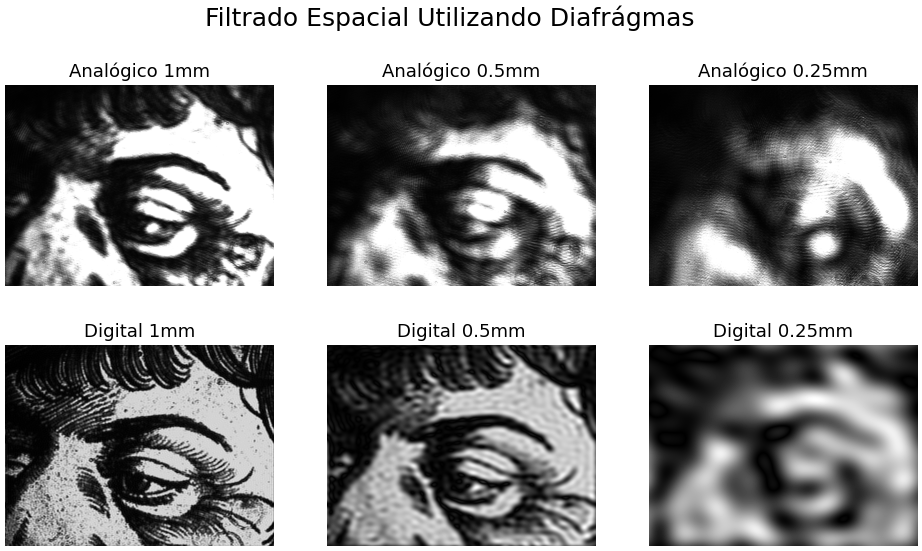

In [11]:
# Now we plot the images in a grid
f, axarr = plt.subplots(2, 3, figsize=(10, 8))
filters = ['1mm', '0.5mm', '0.25mm']

f.tight_layout()

for i, img in enumerate(analog):
    axarr[0, i].imshow(np.abs(analog[i]), cmap='gray')
    axarr[1, i].imshow(np.abs(digital[i]), cmap='gray')
    
    axarr[0, i].set_axis_off()
    axarr[1, i].set_axis_off()

    axarr[0, i].set_title(f'Analógico {filters[i]}', fontsize=13)
    axarr[1, i].set_title(f'Digital {filters[i]}', fontsize=13)

f.subplots_adjust(wspace=0.2, hspace=-0.45)
f.suptitle('Filtrado Espacial Utilizando Diafrágmas', x=0.5, y=0.9, fontsize=18)


plt.savefig('Resultados/diafragmas_circulares.jpg')
plt.show()

    

### Filtros Paso Alto 

Cargamos las imagenes obtenidas en el laboratorio.

In [12]:
maximh_1mm = img_2_gray('Imagenes/maxim2_alta(1mm).bmp', plot=False)
maximh_05mm = img_2_gray('Imagenes/maxim2_alta(0.5mm).bmp', plot=False)
maximh_025mm = img_2_gray('Imagenes/maxim2_alta(0.25mm).bmp', plot=False)

analog_obs = [maximh_1mm, maximh_05mm, maximh_025mm]

Aplicamos filtros pasa-alto, esto es obstáculos circulares, en el plano de fourier a la imagen original para simular los resultados analógicos. 

In [13]:
# 1mm
r = 0.5 * u.mm
pix_size = 3.75 * u.micrometer
radius = m_to_pc(maximd_ft, pix_size, r)
maximdh_1mm = obstacle_mask(maximd_ft, radius, plot=False)
maximdh_1mm = plot2d_ift(maximdh_1mm, plot=False)

# 0.5mm
r = 0.25 * u.mm
pix_size = 3.75 * u.micrometer
radius = m_to_pc(maximd_ft, pix_size, r)
maximdh_05mm = obstacle_mask(maximd_ft, radius, plot=False)
maximdh_05mm = plot2d_ift(maximdh_05mm, plot=False)

# 0.25mm
r = 0.125 * u.mm
pix_size = 3.75 * u.micrometer
radius = m_to_pc(maximd_ft, pix_size, r)
maximdh_025mm = obstacle_mask(maximd_ft, radius, plot=False)
maximdh_025mm = plot2d_ift(maximdh_025mm, plot=False)

digital_obs = [maximdh_1mm, maximdh_05mm, maximdh_025mm]

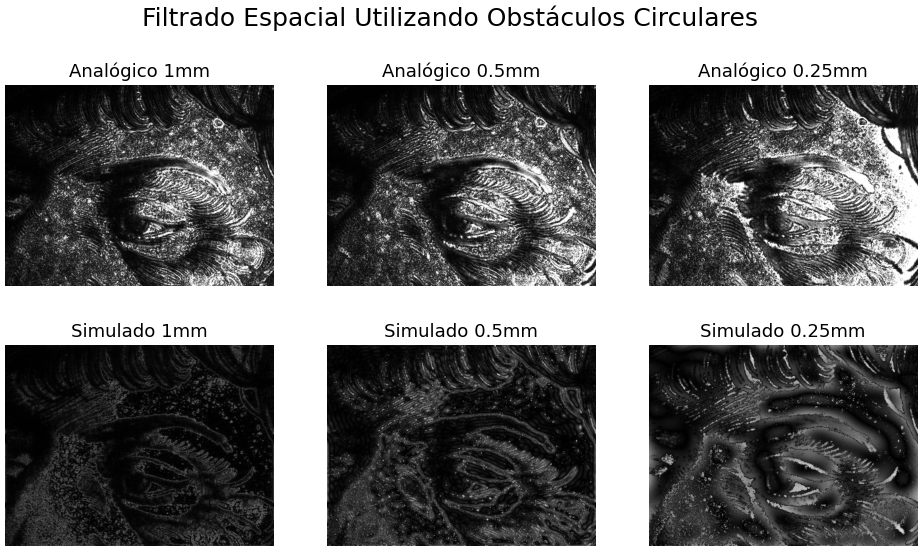

In [14]:
# Now we plot the images in a grid
f, axarr = plt.subplots(2, 3, figsize=(10, 8))
filters = ['1mm', '0.5mm', '0.25mm']

f.tight_layout()

for i, img in enumerate(analog_obs):
    axarr[0, i].imshow(np.abs(analog_obs[i]), cmap='gray')
    axarr[1, i].imshow(np.abs(digital_obs[i]), cmap='gray')
    
    axarr[0, i].set_axis_off()
    axarr[1, i].set_axis_off()

    axarr[0, i].set_title(f'Analógico {filters[i]}', fontsize=13)
    axarr[1, i].set_title(f'Simulado {filters[i]}', fontsize=13)

f.subplots_adjust(wspace=0.2, hspace=-0.45)
f.suptitle('Filtrado Espacial Utilizando Obstáculos Circulares', x=0.5, y=0.9, fontsize=18)

plt.savefig('Resultados/obstáculos_circulares.jpg')
plt.show()

### Filtrado Utilizando Rendijas y Obstáculos Rectangulares

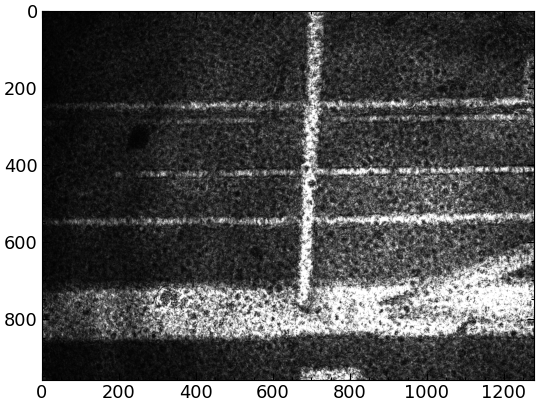

In [15]:
cercha = img_2_gray('Imagenes/metro_exp-11.bmp', plot=True)

Veamos las dimensiones reales de la imagen

In [16]:
cercha.shape

(960, 1280)

In [17]:
display((np.array([maxim.shape[0], maxim.shape[1]]) * 3.75 * u.micrometer).to('mm'))

array([3.6, 4.8]) <Unit('millimeter')>

Primero utilizamos una mascara de rendija horizontal para eliminar las lineas verticales de la cercha

In [18]:
# Cargamos los resultados experimentales
cercha_rendh02mm = img_2_gray('Imagenes/metro_rendijaHorizontal(0.2mm).bmp', plot=False)

In [19]:
h = (0.2 / factor) * u.mm # Height of all the image
l = 4.8 * u.mm
pix_size = 3.75 * u.micrometer
lp, hp = lh_to_pc(cercha, pix_size, l, h)

cerchad_ft = plot2d_ft(cercha)
cerchad_ft = slit_mask(cerchad_ft, lp, hp, plot=False)
cerchad_rendh02mm = plot2d_ift(cerchad_ft, plot=False)

Ahora utilizemos una línea horizontal para eliminar las lineas verticales en la imagen


In [20]:
cercha_rendv02mm = img_2_gray('Imagenes/metro_rendijaVertical(0.2mm).bmp', plot=False)

In [21]:
h = 3.6 * u.mm # Height of all the image
l = (0.2 / factor) * u.mm 
pix_size = 3.75 * u.micrometer
lp, hp = lh_to_pc(cercha, pix_size, l, h)

cerchad_ft = plot2d_ft(cercha)
cerchad_ft = slit_mask(cerchad_ft, lp, hp, plot=False)
cerchad_rendv02mm = plot2d_ift(cerchad_ft, plot=False)

Now Let's visualize the results 

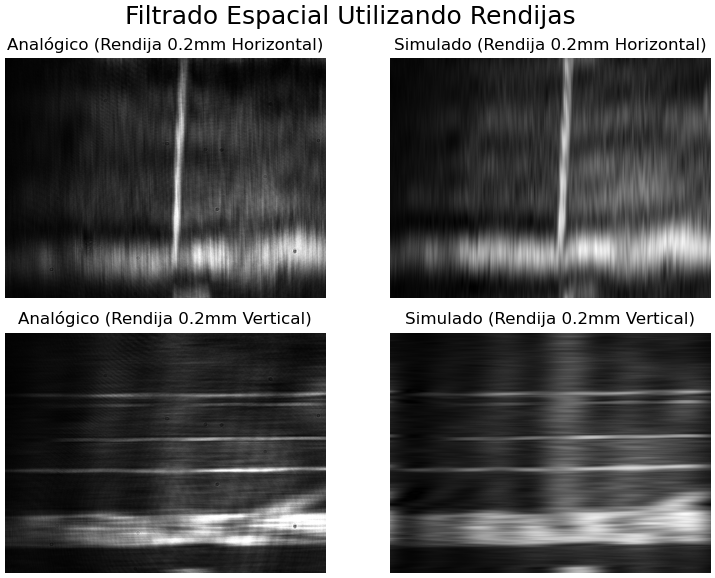

In [22]:
hor = [cercha_rendh02mm, cerchad_rendh02mm]
ver = [cercha_rendv02mm, cerchad_rendv02mm]

f, axarr = plt.subplots(2, 2, figsize=(8, 8))
filters = ['0.2mm', '0.2mm']
titles = ['Analógico','Simulado']

f.tight_layout()

for i, img in enumerate(hor):
    axarr[0, i].imshow(np.abs(hor[i]), cmap='gray')
    axarr[1, i].imshow(np.abs(ver[i]), cmap='gray')
    
    axarr[0, i].set_axis_off()
    axarr[1, i].set_axis_off()

    axarr[0, i].set_title(f'{titles[i]} (Rendija {filters[i]} Horizontal)', fontsize=12)
    axarr[1, i].set_title(f'{titles[i]} (Rendija {filters[i]} Vertical)', fontsize=12)

f.subplots_adjust(wspace=0.2, hspace=-0.4)
f.suptitle('Filtrado Espacial Utilizando Rendijas', x=0.5, y=0.9, fontsize=18)

plt.savefig('Resultados/rendijas.jpg')
plt.show()

Podemos obtener resultados similares utilizando obstáculos rectangulares. Solo que en este caso una obstáculo en la misma dirección que una línea en la imágen la dejará pasar. Veamos esto con en el caso vertical.b

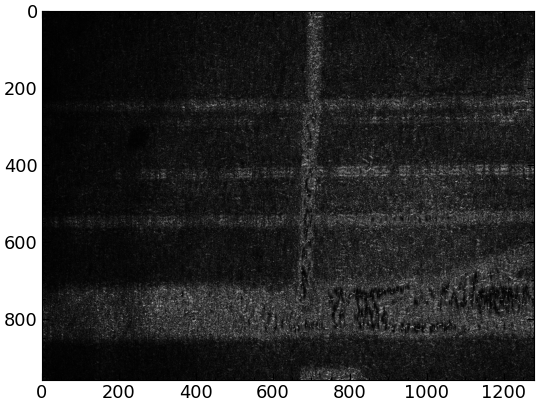

In [23]:
h = 0.2 * u.mm # Height of all the image
l = 4.8 * u.mm
pix_size = 3.75 * u.micrometer
lp, hp = lh_to_pc(cercha, pix_size, l, h)

cerchad_ft = plot2d_ft(cercha)
cerchad_ft = slit_obs_mask(cerchad_ft, lp, hp, plot=False)
cerchad_obsv02mm = plot2d_ift(cerchad_ft, plot=True)

### Veamos el caso para patrones de líneas con ángulo

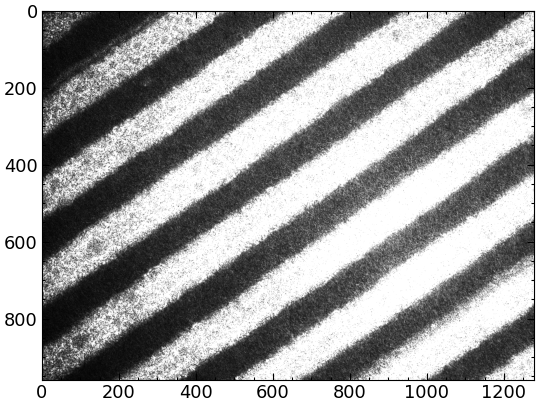

In [24]:
diagonal = img_2_gray('Imagenes/rendijasDerecha_exp-12.bmp', plot=True)

Al utilizar una rendija de 0.2mm, puesta en diagonal, con un angulo opuesto al que tiene las linea sen la imagen, se obtuvo:

In [25]:
diagonal_rend02mm_w_angle = img_2_gray('Imagenes/rendijasDerecha_rendijaVolteadaDER(0.2).bmp', plot=False)

Ahora simulemos estos resultados: 

In [26]:
h = 8 * u.mm # Height of all the image
l = 0.2 * factor * u.mm
pix_size = 3.75 * u.micrometer
lp, hp = lh_to_pc(cercha, pix_size, l, h)

diagonal_ft = plot2d_ft(diagonal)
diagonal_ft = slit_mask(diagonal_ft, lp, hp, angle=45, plot=False)
diagonald_rend02mm_w_angle = plot2d_ift(diagonal_ft, plot=False)

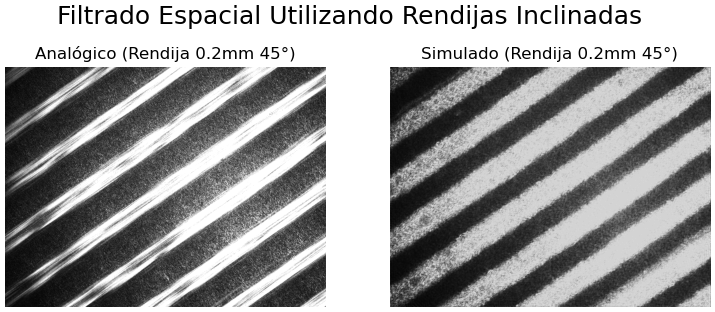

In [27]:
diagonales = [diagonal_rend02mm_w_angle, diagonald_rend02mm_w_angle]


f, axarr = plt.subplots(1, 2, figsize=(8, 8))
filters = ['0.2mm', '0.2mm']
titles = ['Analógico','Simulado']

f.tight_layout()

for i, img in enumerate(diagonales):
    axarr[i].imshow(np.abs(diagonales[i]), cmap='gray')
    
    axarr[i].set_axis_off()

    axarr[i].set_title(f'{titles[i]} (Rendija {filters[i]} 45°)', fontsize=12)

f.subplots_adjust(wspace=0.2, hspace=-0.4)
f.suptitle('Filtrado Espacial Utilizando Rendijas Inclinadas', x=0.5, y=0.74, fontsize=18)

plt.savefig('Resultados/redinjas_inclinadas.jpg')
plt.show()

### También puede ser interesante ver el efecto en un tejido

Veamos una malla hexagonal

In [28]:
hexagonos = img_2_gray('Imagenes/hexagono_fo_1.bmp', plot=False)

In [29]:
hexagono_min_aperture = img_2_gray('Imagenes/hexagono_4.bmp', plot=False)

In [30]:
# 0.5mm diameter
r = 0.5 * u.mm
pix_size = 3.75 * u.micrometer
radius = m_to_pc(maximd_ft, pix_size, r)
hexagonos_ft = plot2d_ft(hexagonos)
hexagonod_min_aperture = circular_mask(hexagonos_ft, radius, plot=False)
hexagonod_min_aperture = plot2d_ift(hexagonod_min_aperture, plot=False)

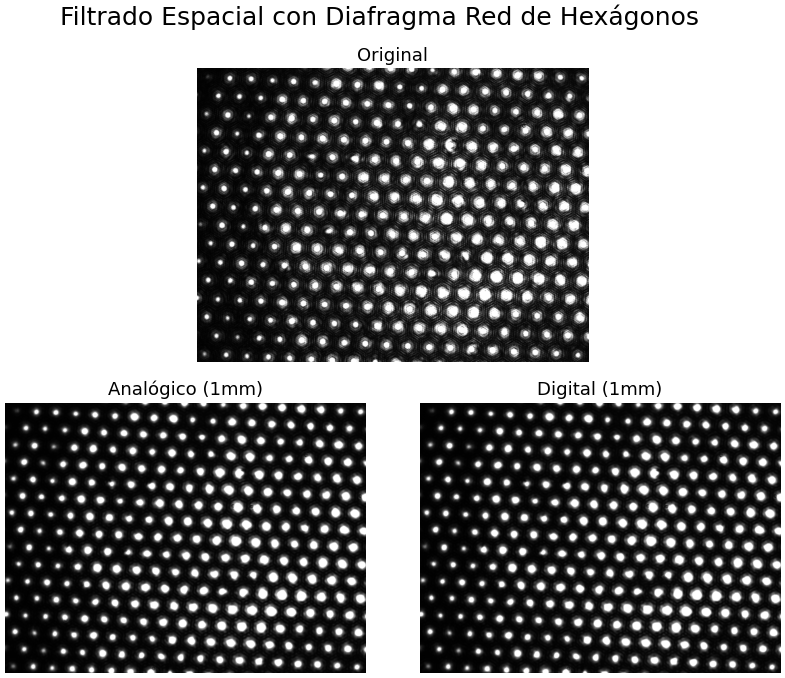

In [31]:
f= plt.figure(figsize=(10,8))

gs = f.add_gridspec(2,2)
ax1 = f.add_subplot(gs[0, :])
ax2 = f.add_subplot(gs[1, 0])
ax3 = f.add_subplot(gs[1, 1])

ax1.imshow(np.abs(hexagonos), cmap='gray')
ax2.imshow(np.abs(hexagono_min_aperture), cmap='gray')
ax3.imshow(np.abs(hexagono_min_aperture), cmap='gray')
    
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

ax1.set_title(f'Original', fontsize=13)
ax2.set_title(f'Analógico (1mm)', fontsize=13)
ax3.set_title(f'Digital (1mm)', fontsize=13)

f.subplots_adjust(wspace=0.15, hspace=0.1)
f.suptitle('Filtrado Espacial con Diafragma Red de Hexágonos', x=0.5, y=0.96, fontsize=18)

plt.savefig('Resultados/hexagonos.jpg')
plt.show()

Ahora veamos el caso para una malla con un patrón tejido. Como el patrón actúa como una rejilla de difracción, al hacer pasar la imagen por un diafragma de diámetro variable, deberíamos poder apreciar como se va perdiendo la información de los ordenes exteriores a medida que cerramos el diafragma.

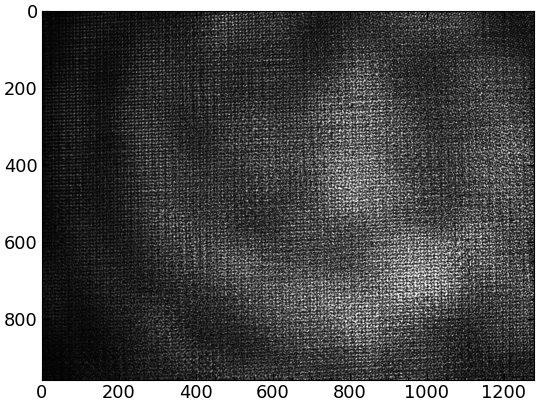

In [32]:
tejido = img_2_gray('Imagenes/malla_1_fo.bmp', plot=True)

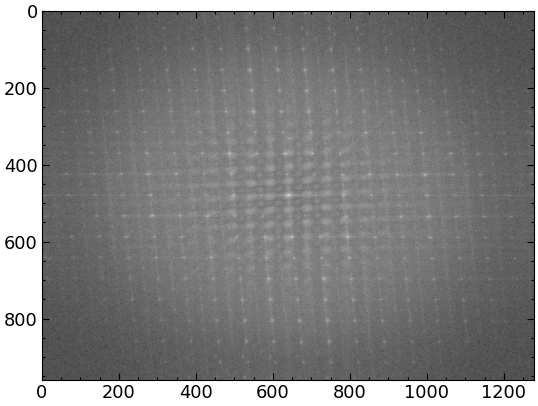

In [33]:
tejido_ft = plot2d_ft(tejido, plot=True)

In [34]:
malla_med = img_2_gray('Imagenes/malla_2_medium.bmp', plot=False)
malla_sc = img_2_gray('Imagenes/malla_3_sc.bmp', plot=False)
malla_fc = img_2_gray('Imagenes/malla_4_fclosed.bmp', plot=False)

mallas_up = [tejido, malla_med]
mallas_down = [malla_sc, malla_fc]

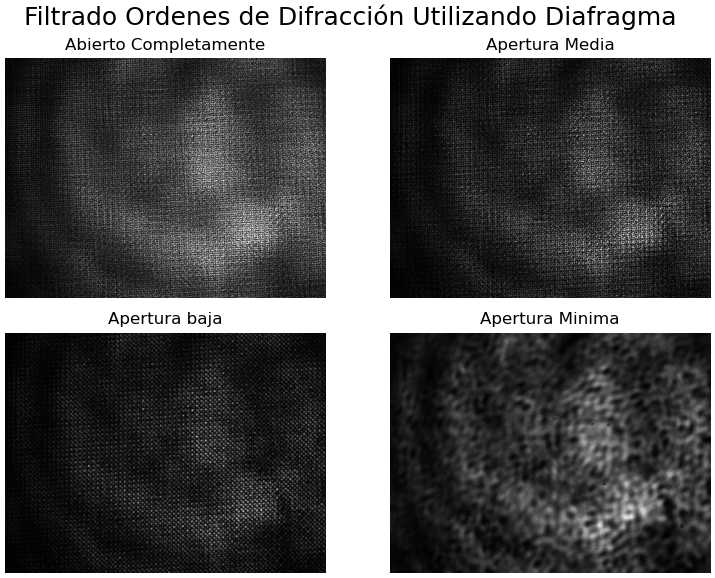

In [35]:
f, axarr = plt.subplots(2, 2, figsize=(8, 8))
filters = ['0.2mm', '0.2mm']
titles1 = ['Abierto Completamente','Apertura Media']
titles2 = ['Apertura baja','Apertura Minima']

f.tight_layout()

for i, img in enumerate(mallas_up):
    axarr[0, i].imshow(np.abs(mallas_up[i]), cmap='gray')
    axarr[1, i].imshow(np.abs(mallas_down[i]), cmap='gray')
    
    axarr[0, i].set_axis_off()
    axarr[1, i].set_axis_off()

    axarr[0, i].set_title(f'{titles1[i]}', fontsize=12)
    axarr[1, i].set_title(f'{titles2[i]}', fontsize=12)

f.subplots_adjust(wspace=0.2, hspace=-0.4)
f.suptitle('Filtrado Ordenes de Difracción Utilizando Diafragma', x=0.5, y=0.9, fontsize=18)

plt.savefig('Resultados/mallas.jpg')
plt.show()

## Parte 2: Retos Computacionales

### Removiendo Ruido Gausseano y Patrones de Periódico

Primero veamos un caso clásico. Lenna Playmate de 1972. En este caso vamos a aplicarle un ruido gausseano y vamos a intentar removerlo utilizando filtrado espacial y un blur gausseano.

In [36]:
lenna = img_2_gray('Imagenes/lenna_color.jpg', plot=False)
lenna_gauss = gauss_noise(lenna, 0, 20, plot=False)

In [37]:
lenna_ft = plot2d_ft(lenna_gauss)
lenna_filter = circular_mask(lenna_ft, 0.25)
lenna_low_pass = plot2d_ift(lenna_filter, plot=False)



In [38]:
lenna_cv2 = gauss_filter(lenna_gauss, 2, plot=False)
mse_arr_lenna = [round(mse(np.abs(lenna), np.abs(lenna)), 2),round(mse(np.abs(lenna), np.abs(lenna_low_pass)), 2)
           , round(mse(np.abs(lenna), np.abs(lenna_cv2)),2)]

In [39]:
mse_arr_lenna

[0.0, 110.54, 107.95]

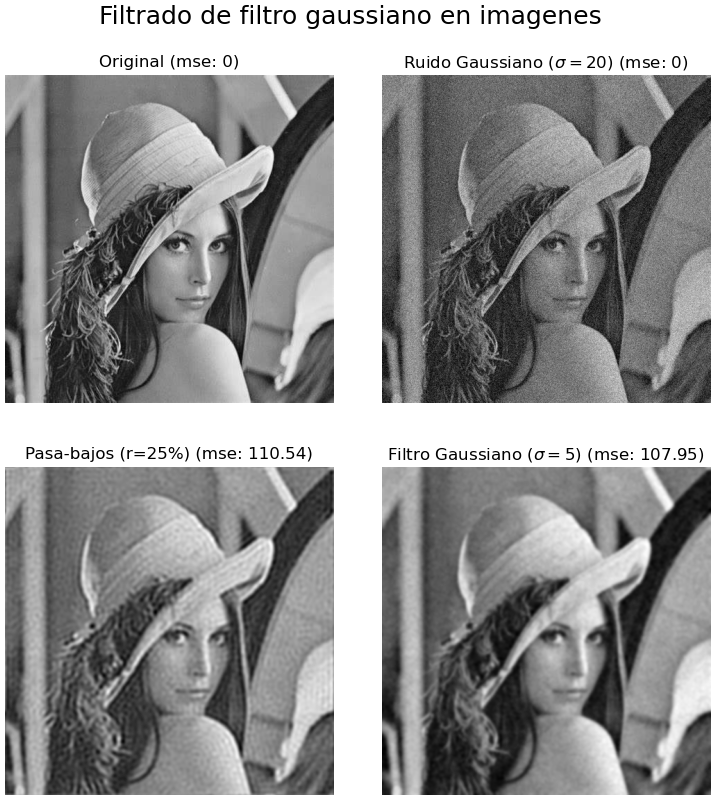

In [40]:
f, axarr = plt.subplots(2, 2, figsize=(8, 8))
lenna_up = [lenna, lenna_gauss]
lenna_down = [lenna_low_pass, lenna_cv2]
titles1 = ['Original', rf'Ruido Gaussiano ($\sigma=20$)']
titles2 = ['Pasa-bajos (r=25%)', rf'Filtro Gaussiano ($\sigma=5$)']

f.tight_layout()

for i, img in enumerate(lenna_up):
    axarr[0, i].imshow(np.abs(lenna_up[i]), cmap='gray')
    axarr[1, i].imshow(np.abs(lenna_down[i]), cmap='gray')
    
    axarr[0, i].set_axis_off()
    axarr[1, i].set_axis_off()

    axarr[0, i].set_title(f'{titles1[i]} (mse: {0})', fontsize=12)
    axarr[1, i].set_title(f'{titles2[i]} (mse: {mse_arr_lenna[i + 1]})', fontsize=12)

f.subplots_adjust(wspace=0.15, hspace=0.15)
f.suptitle('Filtrado de filtro gaussiano en imagenes', x=0.5, y=1.05, fontsize=18)

plt.savefig('Resultados/lenna_comparacion.jpg')
plt.show()

Ahora veamos el caso de un patrón continuo como el de la impresión de un periódico. Un ligero filtro pasabajo debe ser suficiente para difuminar el patrón. Como en general los bordes de los circulos del patrón son más gruesos que los del dibujo, la frequencia asociada es aún más alta y también más fácil de filtrar sin perder calidad en la imagen. 

In [41]:
cartoon = img_2_gray('Imagenes/periodico_peq.png', plot=False)

In [42]:
cartoon_ft = plot2d_ft(cartoon)
cartoon_filter = circular_mask(cartoon_ft, 0.4)
cartoon_low_pass = plot2d_ift(cartoon_filter, plot=False)

Ahora hagamos lo mismo emborronando la imagen utilizando cv2

In [43]:
cartoon_cv2 = cv2.medianBlur(cartoon, 5)
mse_arr = [round(mse(np.abs(cartoon), np.abs(cartoon)), 2),round(mse(np.abs(cartoon), np.abs(cartoon_low_pass)), 2)
           , round(mse(np.abs(cartoon), np.abs(cartoon_cv2)),2)]


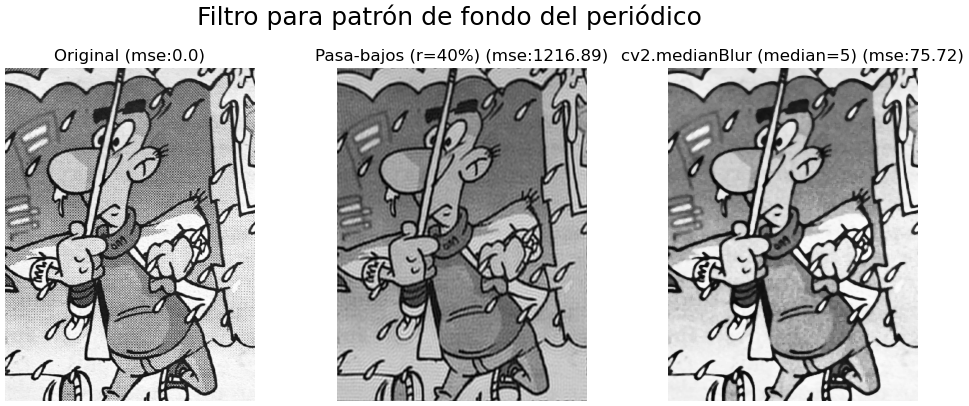

In [44]:
f, axarr = plt.subplots(1, 3, figsize=(10, 8))
cartoons = [cartoon, cartoon_low_pass, cartoon_cv2]
titles = ['Original','Pasa-bajos (r=40%)', 'cv2.medianBlur (median=5)']


f.tight_layout()

for i, img in enumerate(cartoons):
    axarr[i].imshow(np.abs(cartoons[i]), cmap='gray')
    
    axarr[i].set_axis_off()

    axarr[i].set_title(f'{titles[i]} (mse:{mse_arr[i]})', fontsize=12)


f.subplots_adjust(wspace=0.33, hspace=-0.4)
f.suptitle('Filtro para patrón de fondo del periódico', x=0.5, y=0.8, fontsize=18)

plt.savefig('Resultados/cartoon_comparacion.jpg')
plt.show()

### Eliminación de la palabra caldas en el billete de $20 Colombia 1983

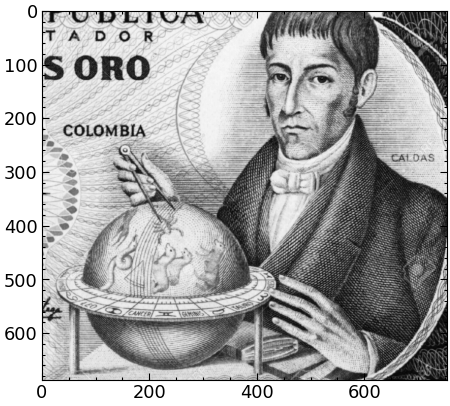

In [45]:
caldas = img_2_gray('Imagenes/Billete.png', plot=True)

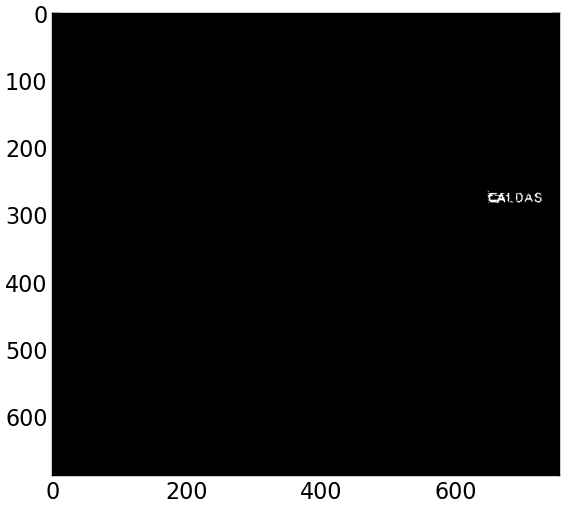

In [46]:
caldas_mask = rectangle_mask(caldas, 645, 265, 85, 20)
for j in range(265, 285):
    for i in range(645, 730):
        if caldas_mask[j, i] >= 150:
            caldas_mask[j, i] = 0
        else:
            caldas_mask[j, i] = 128
plt.imshow(caldas_mask, cmap='gray')

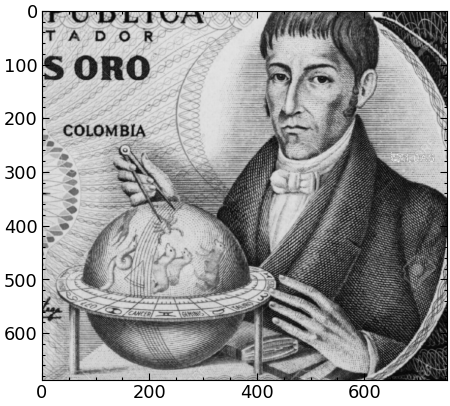

In [47]:
caldas_mask_ft = plot2d_ft(caldas_mask, plot=False)
caldas_ft = plot2d_ft(caldas)
caldas_filtered_ft = caldas_ft + (caldas_mask_ft)
caldas_filtered = plot2d_ift(caldas_filtered_ft, plot=True)

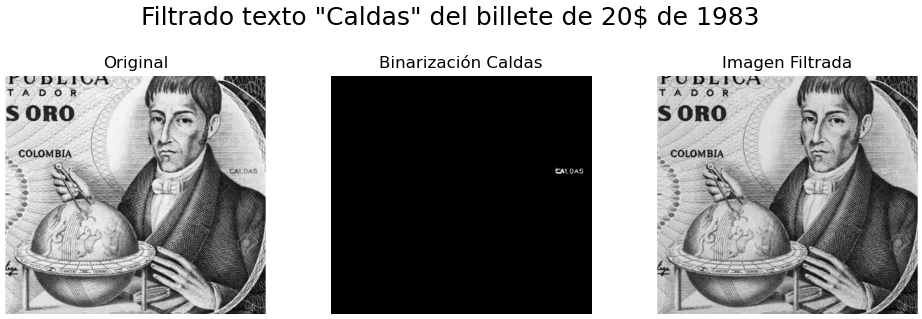

In [48]:
f, axarr = plt.subplots(1, 3, figsize=(10, 8))
cartoons = [caldas, caldas_mask, caldas_filtered]
titles = ['Original','Binarización Caldas', 'Imagen Filtrada']


f.tight_layout()

for i, img in enumerate(cartoons):
    axarr[i].imshow(np.abs(cartoons[i]), cmap='gray')
    
    axarr[i].set_axis_off()

    axarr[i].set_title(f'{titles[i]}', fontsize=12)


f.subplots_adjust(wspace=0.25, hspace=-0.4)
f.suptitle('Filtrado texto "Caldas" del billete de 20$ de 1983', x=0.5, y=0.75, fontsize=18)

plt.savefig('Resultados/caldas_comparacion.jpg')
plt.show()

### Localización de Detalles Específicos Diferenciables en una Imagen


Para esto diseñamos una imagen con diferentes patrones espaciales fácilmente diferenciables. 

In [49]:
mapa = img_2_gray('Imagenes/mapa.jpg', plot=False)

In [50]:
mapa_ft = plot2d_ft(mapa, plot=False)

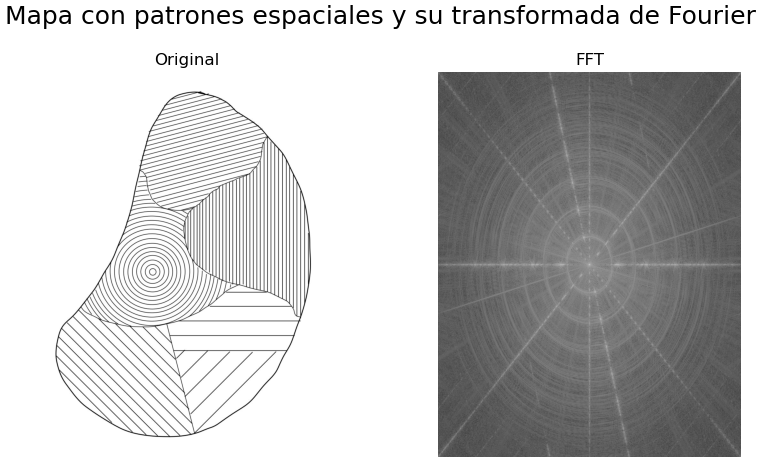

In [51]:
f, axarr = plt.subplots(1, 2, figsize=(8, 6))
mapas = [mapa, mapa_ft]
titles = ['Original','FFT']


f.tight_layout()

for i, img in enumerate(mapas):
    if i == 0:
        axarr[i].imshow(np.abs(mapas[i]), cmap='gray')
    else:
        axarr[i].imshow(np.log1p(np.abs(mapas[i])), cmap='gray')
    
    axarr[i].set_axis_off()

    axarr[i].set_title(f'{titles[i]}', fontsize=12)


f.subplots_adjust(wspace=0.33, hspace=-0.4)
f.suptitle('Mapa con patrones espaciales y su transformada de Fourier', x=0.5, y=0.95, fontsize=18)

plt.savefig('Resultados/mapa_mapaft.jpg')
plt.show()

In [52]:
masked_mapa_ft = slit_mask(mapa_ft, 1, 0.025)
masked_mapa_ft2 = slit_mask(mapa_ft, 0.02, 1)
masked_mapa_ft3 = slit_mask(mapa_ft, 4, 0.03, angle = 45)
masked_mapa_ft4 = slit_mask(mapa_ft, 0.025, 4, angle = 40)
masked_mapa_ft5 = slit_mask(mapa_ft, 0.02, 4, angle = 11.5)
masked_mapa_ft6 = circular_mask(mapa_ft, 0.1)

In [53]:
filtered_mapa = plot2d_ift(masked_mapa_ft) #Rendija horizontal, solo deja pasar las lineas verticales
filtered_mapa2 = plot2d_ift(masked_mapa_ft2) #Rendija vertical, solo deja pasar las lineas horizontales
filtered_mapa3 = plot2d_ift(masked_mapa_ft3) #Rendija volteada 45 grados a la derecha, solo deja pasar las lineas que están a 45 grados a la izquierda
filtered_mapa4 = plot2d_ift(masked_mapa_ft4) #Rendija volteada 40 grados a la izquierda, solo deja pasar las lineas que están a 40 grados a la izquierda
filtered_mapa5 = plot2d_ift(masked_mapa_ft5) #Rendija volteada 15 grados a la izquierda, solo deja pasar las lineas que están a 15 grados a la derecha
filtered_mapa6 = plot2d_ift(masked_mapa_ft6) #Máscara circular, desaparecen las líneas más frecuentes

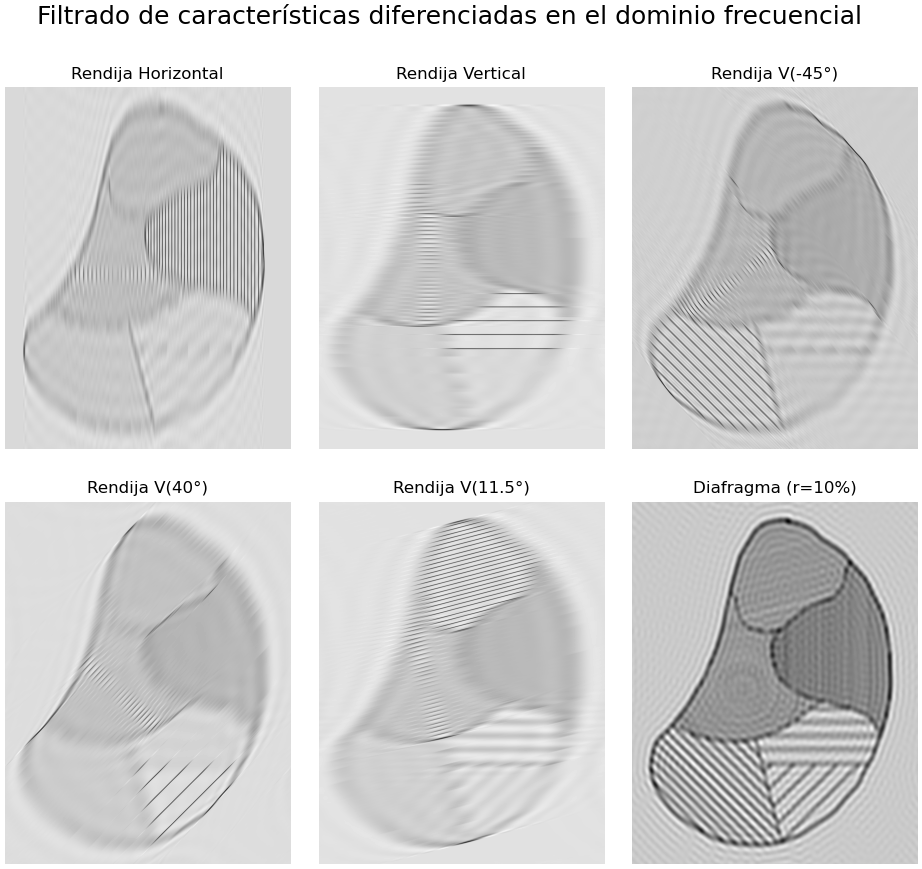

In [54]:
f, axarr = plt.subplots(2, 3, figsize=(10, 10))
mapas_up = [filtered_mapa, filtered_mapa2, filtered_mapa3]
mapas_down = [filtered_mapa4, filtered_mapa5, filtered_mapa6]
titles1 = ['Rendija Horizontal', 'Rendija Vertical', 'Rendija V(-45°)']
titles2 = ['Rendija V(40°)', 'Rendija V(11.5°)', 'Diafragma (r=10%)']

f.tight_layout()

for i, img in enumerate(mapas_up):
    axarr[0, i].imshow(np.abs(mapas_up[i]), cmap='gray')
    axarr[1, i].imshow(np.abs(mapas_down[i]), cmap='gray')
    
    axarr[0, i].set_axis_off()
    axarr[1, i].set_axis_off()

    axarr[0, i].set_title(f'{titles1[i]}', fontsize=12)
    axarr[1, i].set_title(f'{titles2[i]}', fontsize=12)

f.subplots_adjust(wspace=0.1, hspace=-0.2)
f.suptitle('Filtrado de características diferenciadas en el dominio frecuencial', x=0.5, y=0.98, fontsize=18)

plt.savefig('Resultados/mapas_comparacion.jpg')
plt.show()